In [5]:
import numpy as np
import pandas as pd
from matplotlib import gridspec
from astropy.io import fits
from astropy.table import Table
from astropy import wcs
from spec_exam import Stack_spec
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from glob import glob
import seaborn as sea
import os
from grizli import model as griz_model

from time import time
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [2]:
s_cand = pd.read_pickle('../dataframes/galaxy_frames/s_candidates.pkl')

good list : 39012, 39364, 41520, 42113, 44042

look into list:29257,38843,40223,42548,42778

bad list :26272, 28319,36176,40623,41148,41659,42820,46345

In [6]:
ref_cat=Table.read(hpath + 'Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii')

In [12]:
ref_cat['f_F850LP'][n_cand.index],n_cand.gids.values

(<Column name='f_F850LP' dtype='float64' length=15>
   0.63018
   0.46152
   0.21721
     -99.0
  0.382561
   0.06883
   0.13595
  0.215349
   0.07408
 -0.049498
  2.093264
  0.364755
  0.191917
   0.11134
  0.266924,
 array([ 6284,  8466, 11814, 13117, 21427, 23026, 23254, 32691, 33093,
        37107, 37189, 37765, 37896, 38061, 38142]))

In [7]:
s_cand.gids.values

array([26272, 28319, 29257, 36176, 38843, 39012, 39364, 40223, 40623,
       41148, 41520, 41659, 42113, 42548, 42778, 42820, 44042, 46345])

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: invalid value encountered in true_divide
  self.opt

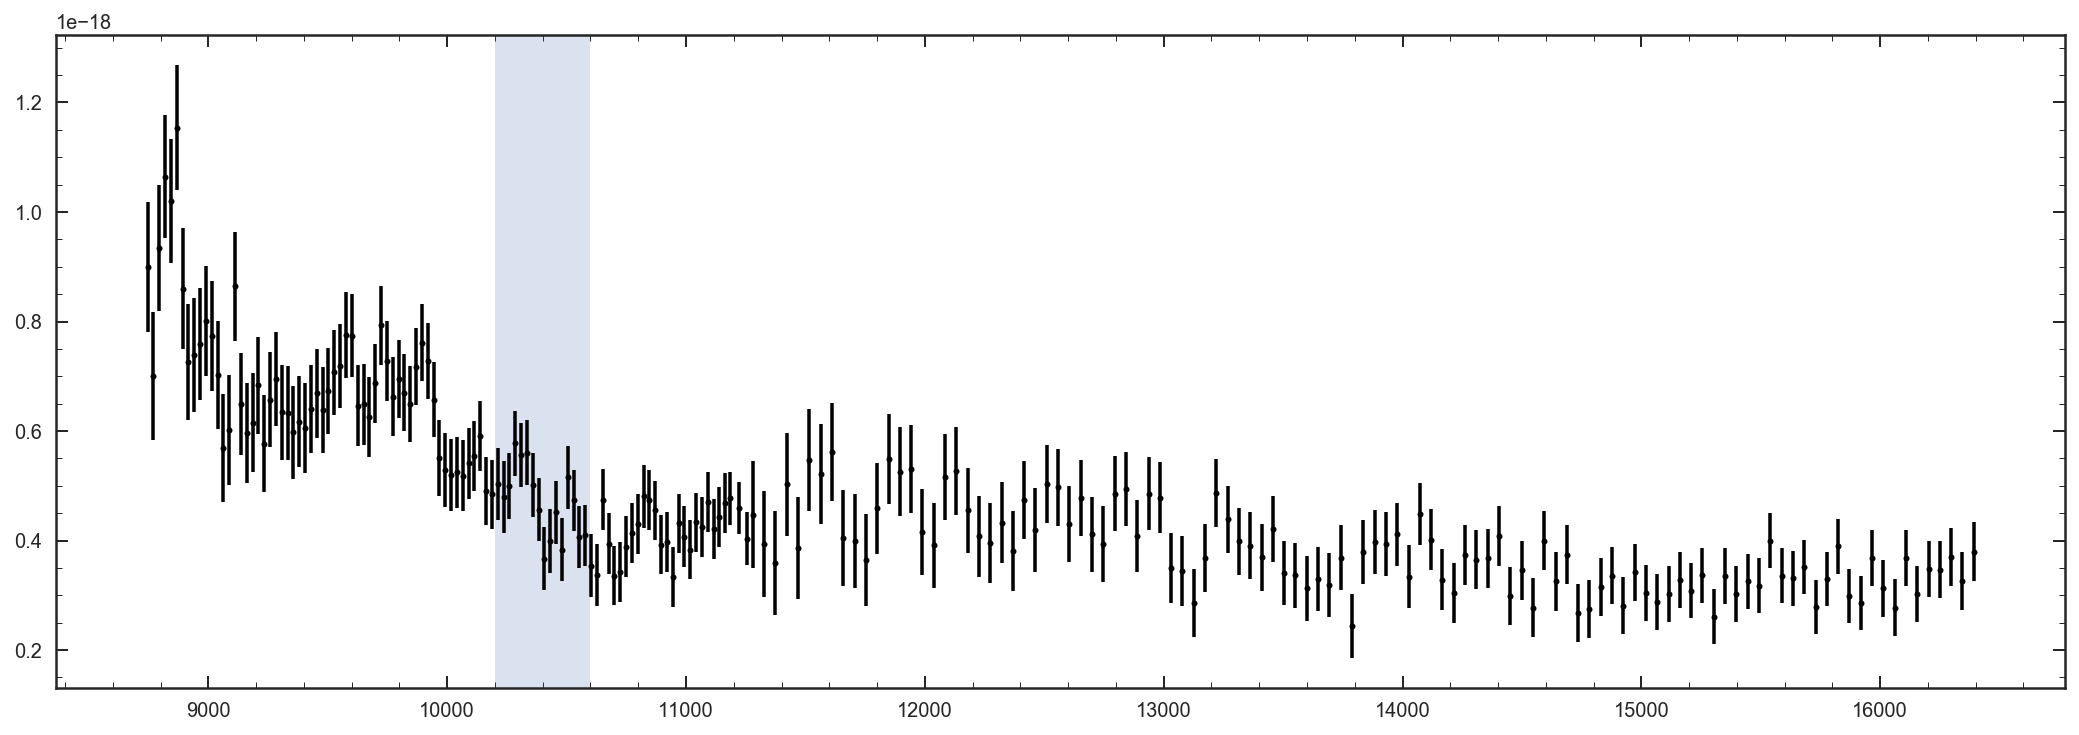

In [39]:
sp = Stack_spec(46345)
plt.figure(figsize=[18,6])
plt.errorbar(sp.stack_wv, sp.stack_fl, sp.stack_er, linestyle='None', marker='o', markersize=3, color='k')
plt.axvspan(2.55 * 4000,2.65 * 4000,alpha=.2)

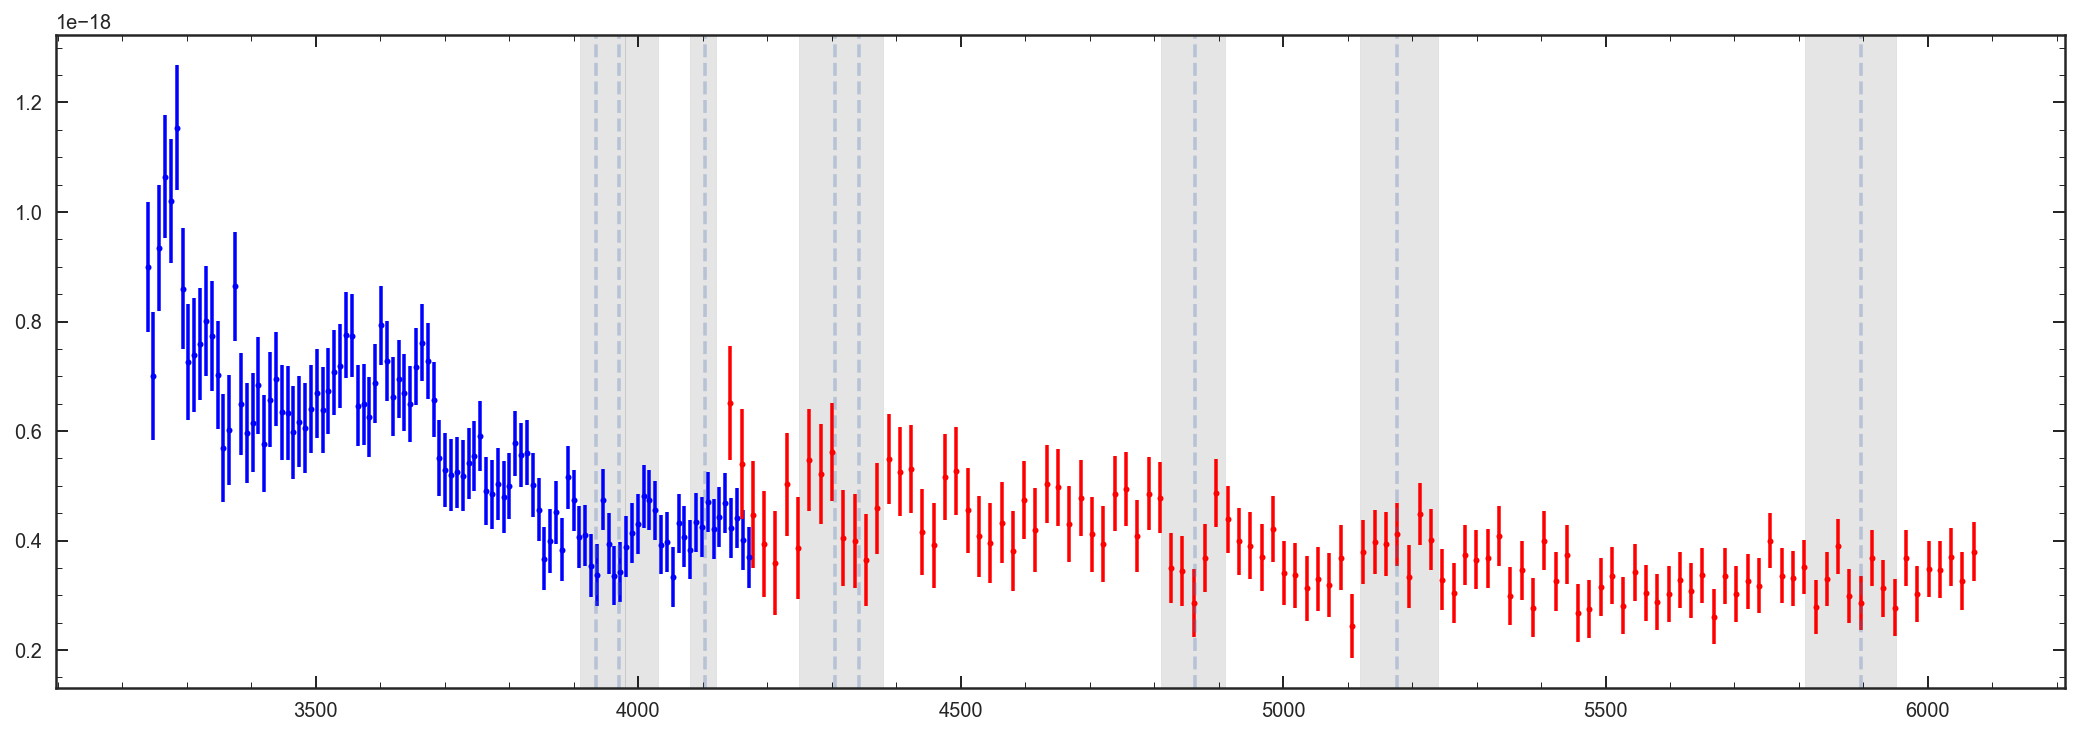

In [44]:
plt.figure(figsize=[18,6])
plt.errorbar(sp.g102_wv/2.7, sp.g102_fl, sp.g102_er, linestyle='None', marker='o', markersize=3, color='b')
plt.errorbar(sp.g141_wv/2.7, sp.g141_fl, sp.g141_er, linestyle='None', marker='o', markersize=3, color='r')
plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvline(5895.6,linestyle='--', alpha=.3)

plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)
plt.axvspan(5810, 5950, color='k', alpha=.1)

In [8]:
n_cand = pd.read_pickle('../dataframes/galaxy_frames/n_candidates.pkl')

good list:

look into list:6284,8466,11814,13117,23254,33093,37107,37765

bad list:21427,23026,32691,37189

In [46]:
n_cand.gids.values

array([ 6284,  8466, 11814, 13117, 21427, 23026, 23254, 32691, 33093,
       37107, 37189, 37765, 37896, 38061, 38142])

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt

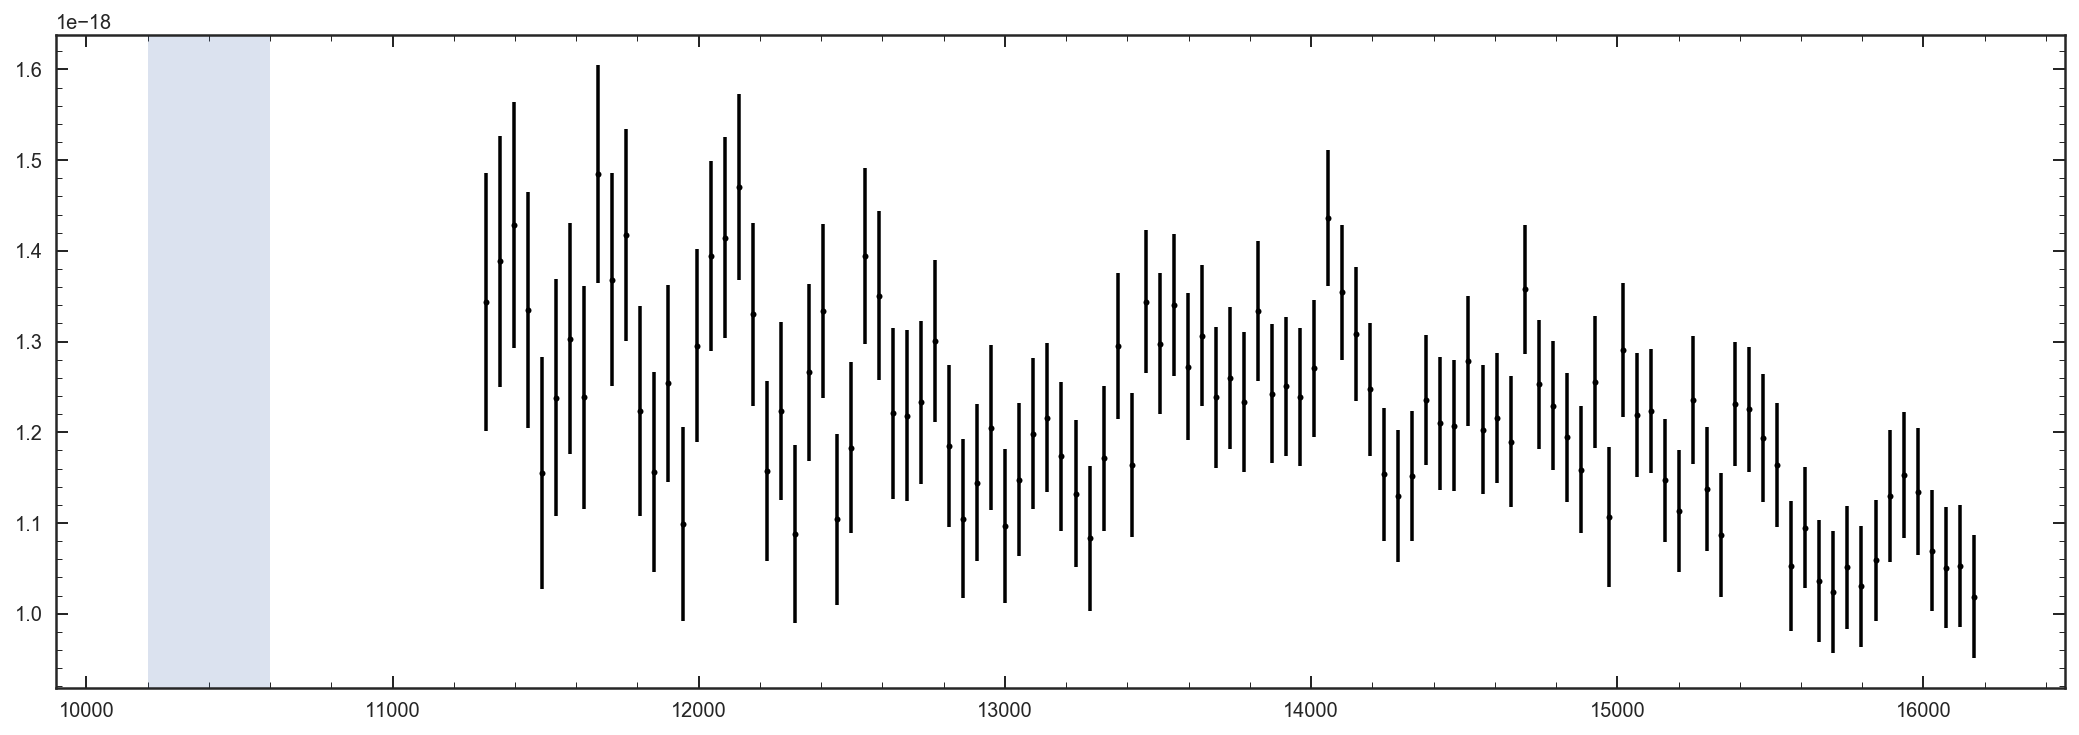

In [13]:
sp = Stack_spec(37107)
plt.figure(figsize=[18,6])
plt.errorbar(sp.stack_wv, sp.stack_fl, sp.stack_er, linestyle='None', marker='o', markersize=3, color='k')
plt.axvspan(2.55 * 4000,2.65 * 4000,alpha=.2)

<ErrorbarContainer object of 3 artists>

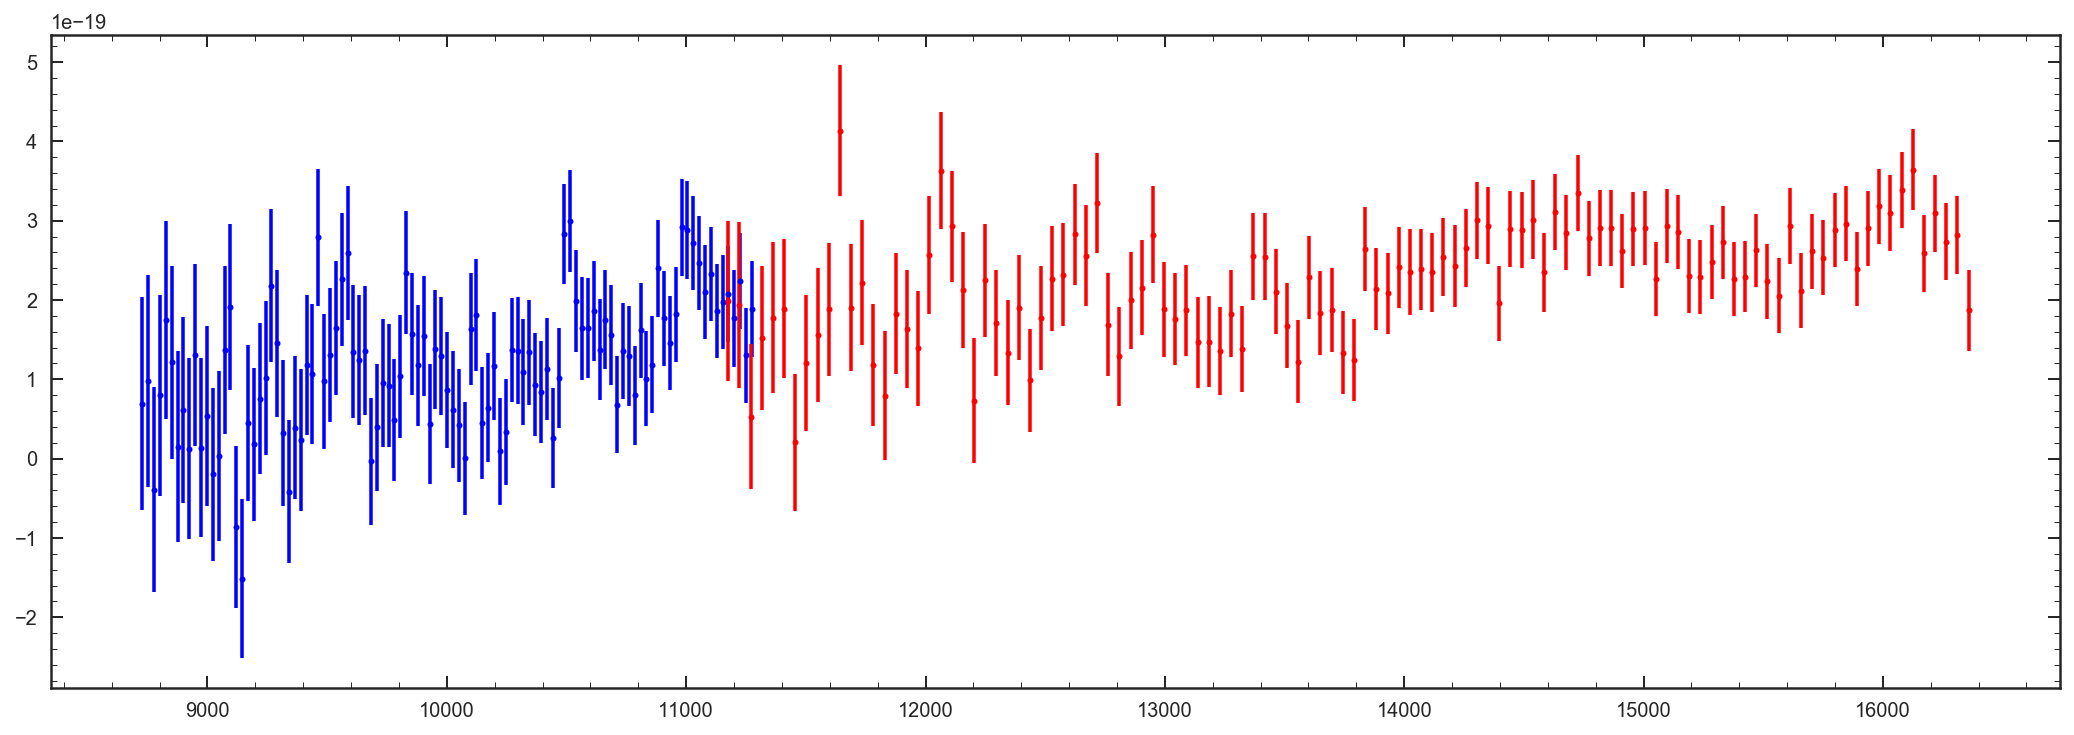

In [68]:
plt.figure(figsize=[18,6])
plt.errorbar(sp.g102_wv, sp.g102_fl, sp.g102_er, linestyle='None', marker='o', markersize=3, color='b')
plt.errorbar(sp.g141_wv, sp.g141_fl, sp.g141_er, linestyle='None', marker='o', markersize=3, color='r')
# plt.axvline(3934.777,linestyle='--', alpha=.3)
# plt.axvline(3969.588,linestyle='--', alpha=.3)
# plt.axvline(4102.89,linestyle='--', alpha=.3)
# plt.axvline(4305.61,linestyle='--', alpha=.3)
# plt.axvline(4341.68,linestyle='--', alpha=.3)
# plt.axvline(4862.68,linestyle='--', alpha=.3)
# plt.axvline(5176.7,linestyle='--', alpha=.3)
# plt.axvline(5895.6,linestyle='--', alpha=.3)

# plt.axvspan(3910, 3980, color='k', alpha=.1)
# plt.axvspan(3980, 4030, color='k', alpha=.1)
# plt.axvspan(4080, 4120, color='k', alpha=.1)
# plt.axvspan(4250, 4380, color='k', alpha=.1)
# plt.axvspan(4810, 4910, color='k', alpha=.1)
# plt.axvspan(5120, 5240, color='k', alpha=.1)
# plt.axvspan(5810, 5950, color='k', alpha=.1)

In [67]:
sp.stack_wv[0:10]

array([8728.29474779, 8752.77995156, 8777.26515532, 8801.75035909,
       8826.23556286, 8850.72076662, 8875.20597039, 8899.69117415,
       8924.17637792, 8948.66158169])

In [ ]:
IDX = [U for U in range(len(sp.stack_wv)) if num1 < sp.stack_wv < num2]

In [69]:
IDX = []

for U in range(len(sp.stack_wv)):
    if 9000 <= sp.stack_wv[U] <= 10000:
        IDX.append(U)

In [72]:
sp.stack_er[IDX]

array([1.09018748e-19, 1.07153563e-19, 1.06047885e-19, 1.04333545e-19,
       1.02608008e-19, 1.00135332e-19, 9.81449848e-20, 9.65202294e-20,
       9.54585285e-20, 9.68240521e-20, 9.64553109e-20, 9.29692334e-20,
       9.20808962e-20, 9.03028126e-20, 9.00408148e-20, 8.98346726e-20,
       8.79884111e-20, 8.78132323e-20, 8.67977132e-20, 8.50471673e-20,
       8.44604895e-20, 8.45718096e-20, 8.35346355e-20, 8.41536121e-20,
       8.33792373e-20, 8.21996379e-20, 8.08944526e-20, 7.98237579e-20,
       8.02382682e-20, 8.08010679e-20, 7.77661208e-20, 7.68425134e-20,
       7.76510063e-20, 7.79172011e-20, 7.71847217e-20, 7.63763647e-20,
       7.57782747e-20, 7.51273226e-20, 7.53664642e-20, 7.44890020e-20])

In [ ]:
def Window_integration(wv,fl,er):
    c= 3E18 # angstrom/s
    nu = c / wv
    Fnu = (wv**2 / c) * fl
    #integrate the top
    #integrate the bottom
    phot = #divide
    
    return phot * c / wv**2
    

def Function(wv,fl,er,blue_window,line_window,red_window):
    # get values
    IDB = []

    for U in range(len(wv)):
        if blue_window[0] <= wv[U] <= blue_window[1]:
            IDB.append(U)
            
    #integrate
    win_val = Window_integration(wv[IDB],fl[IDB],er[IDB])
    

In [ ]:
Function(wv,fl,er,[num1,num2],line_window,red_window)

$ y = \frac{y_2 - y_1}{x_2 - x_1}(x -x_1) +y_1 $

In [78]:
x=[1,2,3]
y=np.array([1050,1100])
z=np.array([4,5,6])

In [77]:
x-z

array([-3, -3, -3])

In [79]:
np.mean(y)

1075.0